In [73]:
!python -m pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install folium
!pip install plotly.express

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.6 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.6 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.6 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.6 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.6 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.6 MB 1.4 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.6 MB 1.4 MB/s eta 0:00:06
   ---------- ----------------------------- 2.6/9.6 MB 1.4 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.6 MB 1.4 MB/s eta 0:00:05
   ------------- -------------------------- 3.1/9.6 MB 1.4 MB/s eta 0:00:05
   -------------- --------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
agency = pd.read_csv('C:/Users/HP/PyCharmMiscProject/agency.txt')
calendar = pd.read_csv('C:/Users/HP/PyCharmMiscProject/calendar.txt')
routes = pd.read_csv('C:/Users/HP/PyCharmMiscProject/routes.txt')
shapes = pd.read_csv('C:/Users/HP/PyCharmMiscProject/shapes.txt')
stops = pd.read_csv('C:/Users/HP/PyCharmMiscProject/stops.txt')
trips = pd.read_csv('C:/Users/HP/PyCharmMiscProject/trips.txt')
stop_times = pd.read_csv('C:/Users/HP/PyCharmMiscProject/stop_times.txt')

The dataset we are going to use :-

In [6]:
agency_name = agency.loc[0, 'agency_name']
start_date = calendar['start_date'].min()
end_date = calendar['end_date'].max()
print("Agency Name:", agency_name)
print("Start Date:", start_date)
print("End Date:", end_date)
# YYYYMMDD format

Agency Name: Delhi Metro Rail Corporation
Start Date: 20190101
End Date: 20251231


Service Frequency by Day of Week

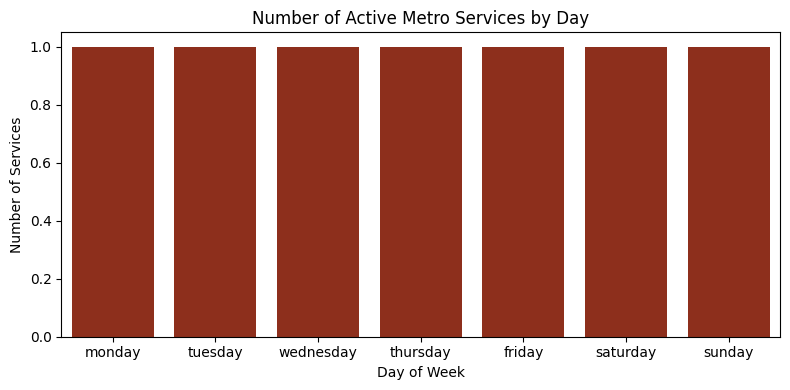

In [11]:
days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
service_freq = calendar[days].sum()
plt.figure(figsize=(8, 4))
sns.barplot(x=service_freq.index, y=service_freq.values, color='#a02309')

plt.title('Number of Active Metro Services by Day')
plt.ylabel('Number of Services')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

Basic description of the dataset:

In [32]:
from IPython.display import display

routes = routes.dropna(axis=1, how='all')
print("ROUTES")
display(routes.head())

shapes = shapes.dropna(axis=1, how='all')
print("SHAPES")
display(shapes.head())

stops = stops.dropna(axis=1, how='all')
print("STOPS")
display(stops.head())

trips = trips.dropna(axis=1, how='all')
print("TRIPS")
display(trips.head())

stop_times = stop_times.dropna(axis=1, how='all')
print("STOP TIMES")
display(stop_times.head())

ROUTES


,route_id,route_short_name,route_long_name,route_type
0,33,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,1
1,31,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,1
2,29,P_MS_R,PINK_Shiv Vihar to Majlis Park,1
3,12,M_JB,MAGENTA_Janak Puri West to Botanical Garden,1
4,11,P_MS,PINK_Majlis Park to Shiv Vihar,1


SHAPES


,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


STOPS


,stop_id,stop_name,stop_lat,stop_lon
0,1,Dilshad Garden,28.675991,77.321495
1,2,Jhilmil,28.675648,77.312393
2,3,Mansrover park,28.675352,77.301178
3,4,Shahdara,28.673531,77.287270
4,5,Welcome,28.671986,77.277931


TRIPS


,route_id,service_id,trip_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,shp_1_30,0,0
1,0,weekday,1,shp_1_30,0,0
2,0,weekday,10,shp_1_30,0,0
3,0,weekday,100,shp_1_30,0,0
4,2,weekday,1000,shp_1_13,0,0


STOP TIMES


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,0,05:28:08,05:28:28,21,0,0,0,0.000,1
1,0,05:30:58,05:31:18,20,1,0,0,1202.405,1
2,0,05:33:28,05:33:48,19,2,0,0,2480.750,1
3,0,05:35:33,05:35:53,18,3,0,0,3314.936,1
4,0,05:37:53,05:38:13,17,4,0,0,4300.216,1


# **Our dataset is now more refined with removed empty cloumns, and thus more comprehensible.**

Visulalizing different coloured Metro lines on Delhi's map

In [56]:
import folium
routes['LineColorShort'] = routes['route_long_name'].fillna('').str.split('_').str[0].str.upper()
LINE_COLOR_MAP = {
    "RED": "red",
    "BLUE": "blue",
    "YELLOW": "gold",
    "GREEN": "green",
    "VIOLET": "purple",
    "ORANGE": "orange",
    "MAGENTA": "magenta",
    "PINK": "pink",
    "GRAY": "gray",
    "AQUA": "cadetblue",
    "RAPID": "lightblue",
    "ORANGE/AIRPORT": "orange",
}

# Create color name column in routes
routes['ColorName'] = routes['LineColorShort'].map(LINE_COLOR_MAP)

# Map route_id → color
route_id_to_color = routes.set_index("route_id")["ColorName"].to_dict()

# Map trip_id → route_id
trip_to_route = trips.set_index("trip_id")["route_id"].to_dict()
stop_times['route_id'] = stop_times['trip_id'].map(trip_to_route)

# stop_id → list of route_ids
stop_to_lines = (
    stop_times
    .groupby('stop_id')['route_id']
    .unique()
    .apply(list)
    .to_dict()
)

# Map stop_id to routes and colors
def get_linecolors_for_stop(stop_id):
    lines = stop_to_lines.get(stop_id, [])
    color_list = [route_id_to_color.get(route_id, 'black') for route_id in lines]
    return ','.join(map(str, lines)), ','.join(color_list)

stops['Routes'], stops['LineColors'] = zip(*stops['stop_id'].map(get_linecolors_for_stop))

# Rename columns as per convenience
df_cleaned = stops.rename(columns={
    'stop_name': 'Station Names',
    'stop_lat': 'Latitude',
    'stop_lon': 'Longitude'
})[['Station Names', 'Latitude', 'Longitude', 'LineColors', 'Routes']]

# Plot the map using CircleMarker
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=11)

for _, row in df_cleaned.iterrows():
    first_color = row['LineColors'].split(',')[0].strip().lower() if row['LineColors'] else 'black'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=first_color,
        fill=True,
        fill_color=first_color,
        fill_opacity=0.85,
        popup=f"{row['Station Names']} [{row['Routes']}]"
    ).add_to(delhi_map)

# Display the map
display(delhi_map)

Bar Plot of Station Counts per Metro Line:

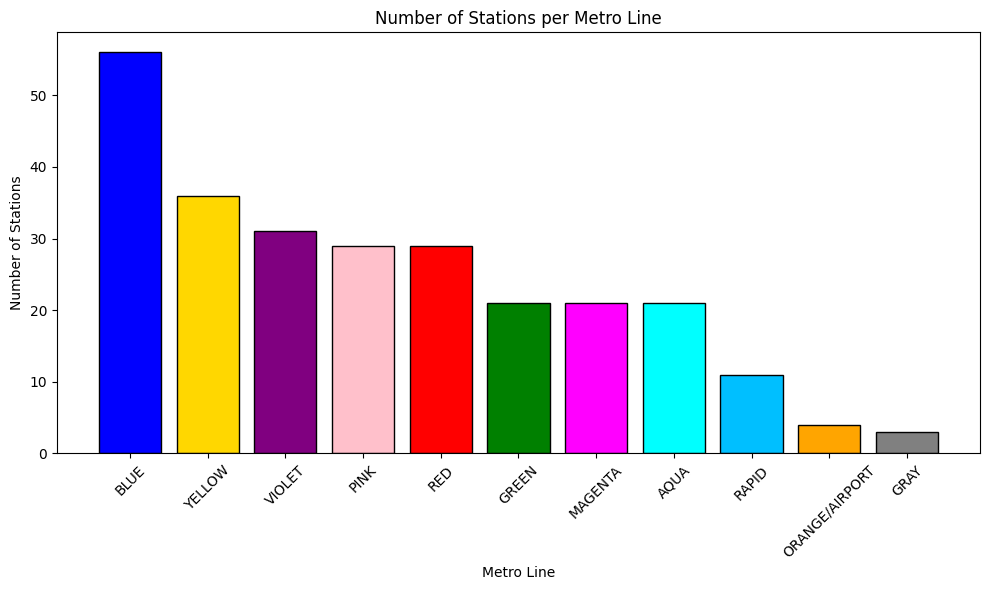

In [62]:
routes['Metro Line'] = routes['route_long_name'].fillna('').str.split('_').str[0].str.upper()
route_id_to_line = routes.set_index('route_id')['Metro Line'].to_dict()

trip_to_route = trips.set_index("trip_id")["route_id"].to_dict()
stop_times['route_id'] = stop_times['trip_id'].map(trip_to_route)
stop_times['Metro Line'] = stop_times['route_id'].map(route_id_to_line)

stop_to_lines = (
    stop_times
    .groupby('stop_id')['Metro Line']
    .unique()
    .apply(list)
    .to_dict()
)

# Assign first line to each stop
stops['Metro Line'] = stops['stop_id'].map(lambda sid: stop_to_lines.get(sid, ['UNKNOWN'])[0])

# Count number of stations per metro line
line_counts = stops['Metro Line'].value_counts()

# Valid color mapping
LINE_COLOR_MAP = {
    "RED": "red",
    "BLUE": "blue",
    "YELLOW": "gold",
    "GREEN": "green",
    "VIOLET": "purple",
    "ORANGE": "orange",
    "MAGENTA": "magenta",
    "PINK": "pink",
    "GRAY": "gray",
    "AQUA": "aqua",
    "RAPID": "deepskyblue",
    "ORANGE/AIRPORT": "orange"
}

bar_colors = [LINE_COLOR_MAP.get(line, 'gray') for line in line_counts.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(line_counts.index, line_counts.values, color=bar_colors, edgecolor='black')

plt.xlabel('Metro Line')
plt.ylabel('Number of Stations')
plt.title('Number of Stations per Metro Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Estimated Average Daily Trips per Metro Line (both directions included)

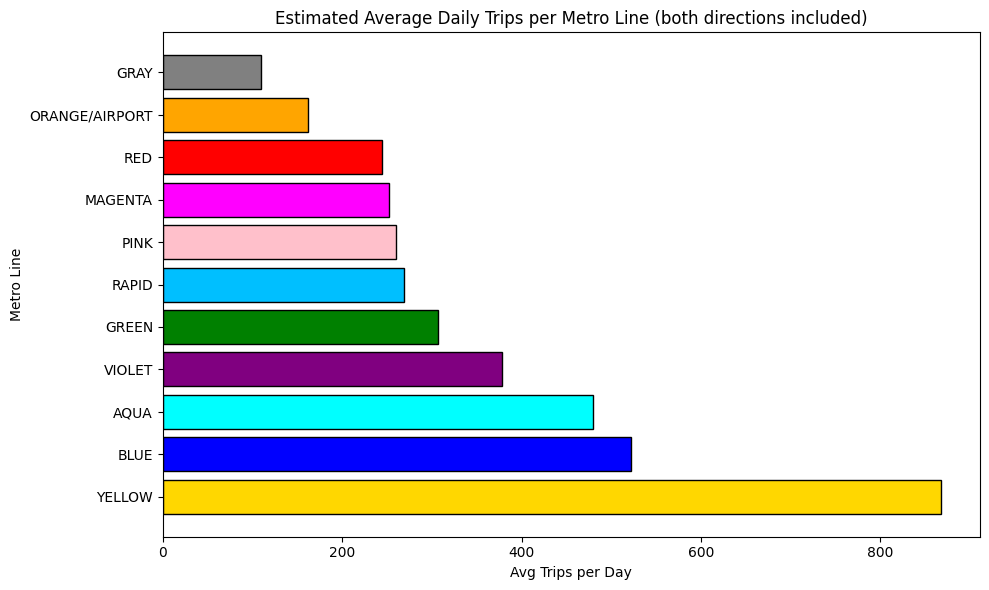

In [61]:
# Extract metro line from route_id
routes['Metro Line'] = routes['route_long_name'].fillna('').str.split('_').str[0].str.upper()
route_id_to_line = routes.set_index('route_id')['Metro Line'].to_dict()

trips['Metro Line'] = trips['route_id'].map(route_id_to_line)
trips_calendar = trips.merge(calendar, on='service_id', how='left')

# Count how many days each trip is active
weekday_cols = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
trips_calendar['active_days'] = trips_calendar[weekday_cols].sum(axis=1)

# Assume each trip runs once per active day → total trip occurrences
trips_calendar['trip_instances_per_week'] = trips_calendar['active_days']

# Group by Metro Line
line_trip_counts = trips_calendar.groupby('Metro Line')['trip_instances_per_week'].sum().reset_index()
line_trip_counts.columns = ['Metro Line', 'Estimated Weekly Trips']

# Convert to average daily trips
line_trip_counts['Avg Trips per Day'] = line_trip_counts['Estimated Weekly Trips'] / 7
line_trip_counts = line_trip_counts.sort_values('Avg Trips per Day', ascending=False)

LINE_COLOR_MAP = {
    "RED": "red", "BLUE": "blue", "YELLOW": "gold", "GREEN": "green", "VIOLET": "purple",
    "ORANGE": "orange", "MAGENTA": "magenta", "PINK": "pink", "GRAY": "gray", "AQUA": "aqua",
    "RAPID": "deepskyblue", "ORANGE/AIRPORT": "orange"
}
bar_colors = [LINE_COLOR_MAP.get(line, 'gray') for line in line_trip_counts['Metro Line']]

plt.figure(figsize=(10, 6))
plt.barh(line_trip_counts['Metro Line'], line_trip_counts['Avg Trips per Day'], color=bar_colors, edgecolor='black')
plt.xlabel('Avg Trips per Day')
plt.ylabel('Metro Line')
plt.title('Estimated Average Daily Trips per Metro Line (both directions included)')
plt.tight_layout()
plt.show()

Average Daily Trips Between Stations (Yellow Line)

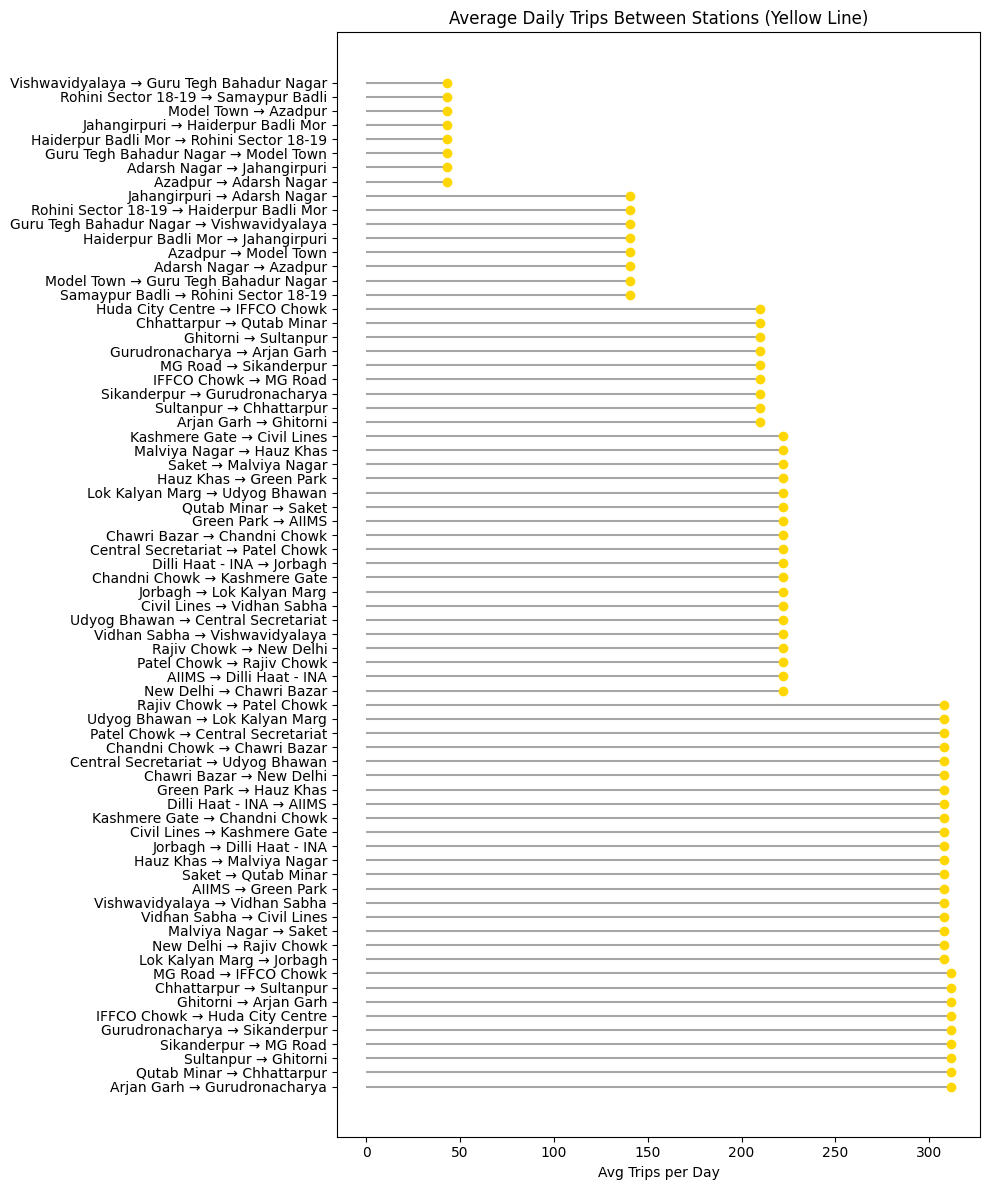

In [66]:
routes['Metro Line'] = routes['route_long_name'].fillna('').str.split('_').str[0].str.upper()
yellow_route_ids = routes[routes['Metro Line'] == 'YELLOW']['route_id'].unique()

yellow_trips = trips[trips['route_id'].isin(yellow_route_ids)].copy()
yellow_trips = yellow_trips.merge(calendar, on='service_id', how='left')
weekday_cols = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
yellow_trips['active_days'] = yellow_trips[weekday_cols].sum(axis=1)
yellow_trips = yellow_trips[yellow_trips['active_days'] > 0]

# Filter stop_times for Yellow Line
yellow_stop_times = stop_times[stop_times['trip_id'].isin(yellow_trips['trip_id'])].copy()
stop_id_to_name = stops.set_index('stop_id')['stop_name'].to_dict()
yellow_stop_times['stop_name'] = yellow_stop_times['stop_id'].map(stop_id_to_name)
yellow_stop_times = yellow_stop_times.sort_values(by=['trip_id', 'stop_sequence'])

# Generate consecutive stop segments
trip_segments = []
for trip_id, group in yellow_stop_times.groupby('trip_id'):
    stop_names = group['stop_name'].tolist()
    for i in range(len(stop_names)-1):
        segment = f"{stop_names[i]} → {stop_names[i+1]}"
        trip_segments.append((trip_id, segment))

# Build segment DataFrame
segment_df = pd.DataFrame(trip_segments, columns=['trip_id', 'segment'])
trip_active_days = yellow_trips.set_index('trip_id')['active_days'].to_dict()
segment_df['active_days'] = segment_df['trip_id'].map(trip_active_days)

# Count weekly trip occurrences per segment
segment_counts = segment_df.groupby('segment')['active_days'].sum().reset_index()
segment_counts['avg_trips_per_day'] = segment_counts['active_days'] / 7
segment_counts = segment_counts.sort_values('avg_trips_per_day', ascending=False)

# Plot lollipop chart
plt.figure(figsize=(10, 12))
y = segment_counts['segment']
x = segment_counts['avg_trips_per_day']

# Lines (stems)
plt.hlines(y=y, xmin=0, xmax=x, color='gray', alpha=0.7)
# Dots
plt.plot(x, y, "o", color='gold')

plt.xlabel('Avg Trips per Day')
plt.title('Average Daily Trips Between Stations (Yellow Line)')
plt.tight_layout()
plt.show()

Top 10 Routes by Average Daily Trips:

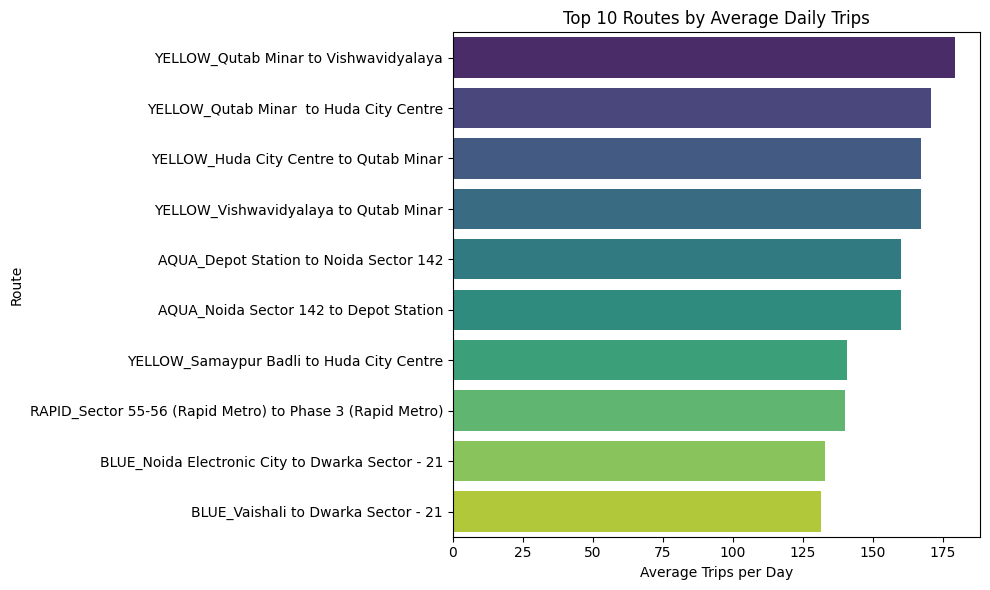

In [69]:
weekday_cols = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
trips_calendar = trips.merge(calendar, on='service_id', how='left')
trips_calendar['active_days'] = trips_calendar[weekday_cols].sum(axis=1)

# Total active days per route
route_avg = (
    trips_calendar.groupby('route_id')['active_days']
    .sum()
    .div(7)  # divide by 7 for average per day
    .reset_index()
    .rename(columns={'active_days': 'avg_trips_per_day'})
)

# Join with route names
route_names = routes.set_index('route_id')['route_long_name'].to_dict()
route_avg['route_name'] = route_avg['route_id'].map(route_names)

# Get top 10 routes by avg trips/day
top_routes = route_avg.sort_values('avg_trips_per_day', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_routes,
    y='route_name',
    x='avg_trips_per_day',
    hue='route_name',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Top 10 Routes by Average Daily Trips')
plt.xlabel('Average Trips per Day')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

Delhi Metro User Density Heatmap

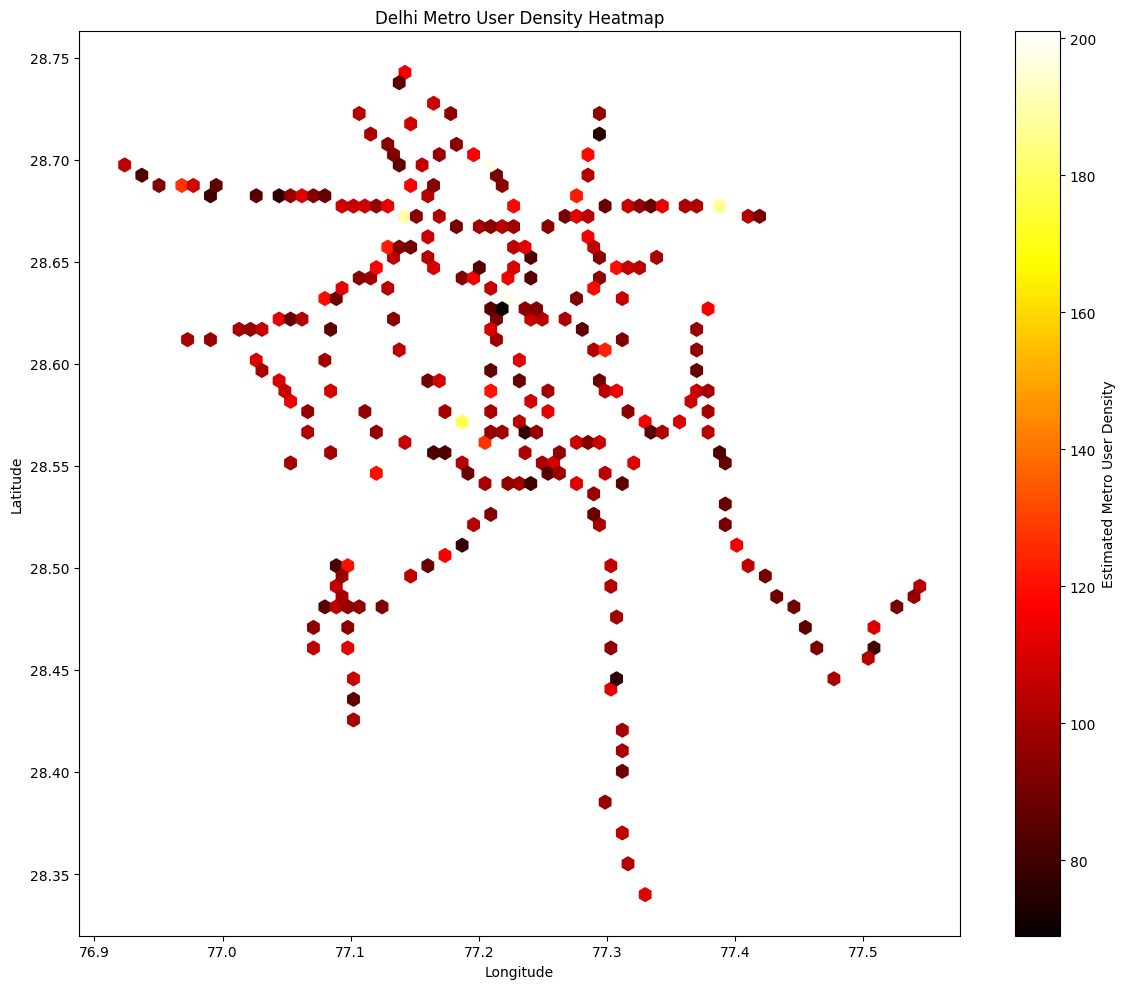

In [38]:
np.random.seed(42)
stops['user_count'] = np.random.poisson(lam=100, size=len(stops))

plt.figure(figsize=(12, 10))
plt.hexbin(
    stops['stop_lon'], stops['stop_lat'],
    C=stops['user_count'],
    gridsize=70,
    reduce_C_function=np.sum,
    cmap='hot',   # red-yellow-white
    mincnt=1
)

plt.colorbar(label='Estimated Metro User Density')
plt.title('Delhi Metro User Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

Distance of Metro Stations on Each Line (in KM)

In [ ]:
# Extract Metro Line short names (for color and labeling)
routes['LineColorShort'] = routes['route_long_name'].str.split('_').str[0]

# Build dictionary for display colors
LINE_COLOR_MAP = {
    "RED": "red",
    "BLUE": "blue",
    "YELLOW": "gold",
    "GREEN": "green",
    "VIOLET": "purple",
    "ORANGE": "orange",
    "MAGENTA": "magenta",
    "PINK": "pink",
    "GRAY": "gray",
    "AQUA": "cadetblue",
    "RAPID": "lightblue",
    "ORANGE/AIRPORT": "orange",
}

# For each route, find all shape_ids associated
route_to_shape = trips.groupby("route_id")["shape_id"].unique().apply(list).to_dict()

# Compute max distance for each shape (in meters), then km
shape_lengths = (
    shapes.groupby("shape_id")["shape_dist_traveled"].max() / 1000.0
)
route_lengths = {}
for route_id, shape_ids in route_to_shape.items():
    shape_ids_filtered = [sid for sid in shape_ids if sid in shape_lengths]
    if shape_ids_filtered:
        route_lengths[route_id] = shape_lengths.loc[shape_ids_filtered].max()
    else:
        route_lengths[route_id] = 0

# Build a DataFrame: one row per route/metro line
route_df = routes.copy()
route_df['Total_Dist_KM'] = route_df['route_id'].map(route_lengths)

# Group by Metro "color" line to avoid duplicates (some lines run in both directions/routes)
df_plot = (
    route_df.groupby('LineColorShort')
    .agg({'Total_Dist_KM': 'max'})
    .reset_index()
    .sort_values('Total_Dist_KM', ascending=False)
)

# Attach Plotly colors for legend
df_plot['Color'] = df_plot['LineColorShort'].map(LINE_COLOR_MAP).fillna('gray')

import plotly.express as px

fig = px.bar(
    df_plot,
    x="LineColorShort",
    y="Total_Dist_KM",
    title="Distance of Metro Stations on Each Line (in KM)",
    color="LineColorShort",
    color_discrete_map=LINE_COLOR_MAP,
    text=df_plot["Total_Dist_KM"].round(1)
)

fig.update_layout(
    xaxis_title="Metro Line",
    yaxis_title="Total Distance (km)",
    uniformtext_minsize=8,
    uniformtext_mode="hide"
)
fig.show()

Histogram of Station Latitudes and longitudes (to show N-S and E-W spread respectively)

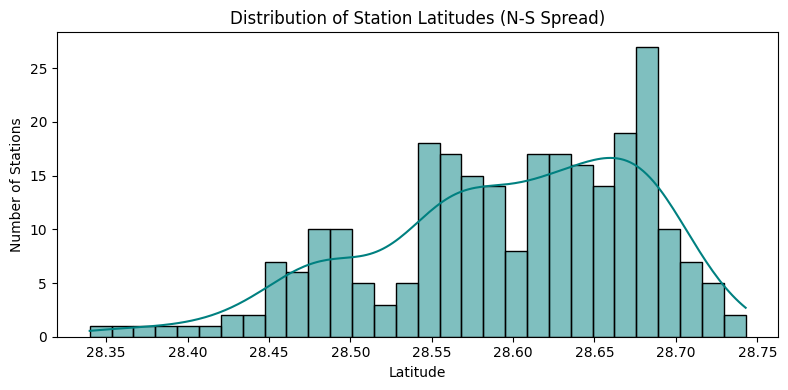

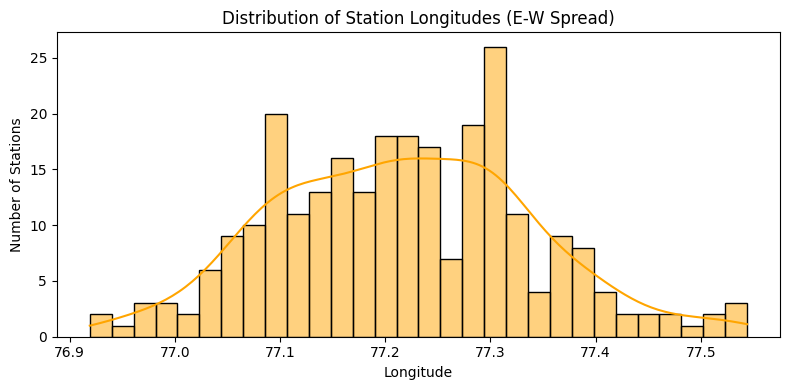

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(stops['stop_lat'], bins=30, kde=True, color='teal')
plt.title('Distribution of Station Latitudes (N-S Spread)')
plt.xlabel('Latitude')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(stops['stop_lon'], bins=30, kde=True, color='orange')
plt.title('Distribution of Station Longitudes (E-W Spread)')
plt.xlabel('Longitude')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()

Frequency of trip durations

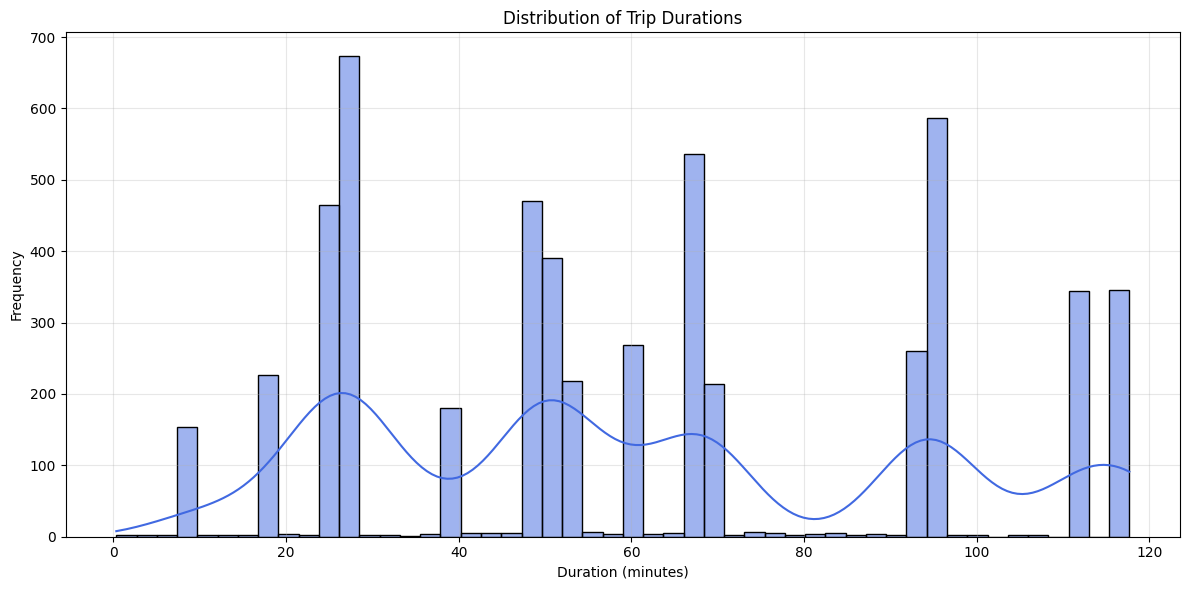

In [37]:
stop_times['arrival_time'] = pd.to_datetime(stop_times['arrival_time'], format='%H:%M:%S', errors='coerce')
stop_times['departure_time'] = pd.to_datetime(stop_times['departure_time'], format='%H:%M:%S', errors='coerce')

trip_durations = stop_times.groupby('trip_id')[['arrival_time','departure_time']].apply(
    lambda x: (x['departure_time'].max() - x['arrival_time'].min()).total_seconds() / 60
).reset_index(name='duration_min')

plt.figure(figsize=(12, 6))
sns.histplot(trip_durations['duration_min'], bins=50, kde=True, color='royalblue')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Top 20 Stations: Boarding Demand vs. Station Dwell Time

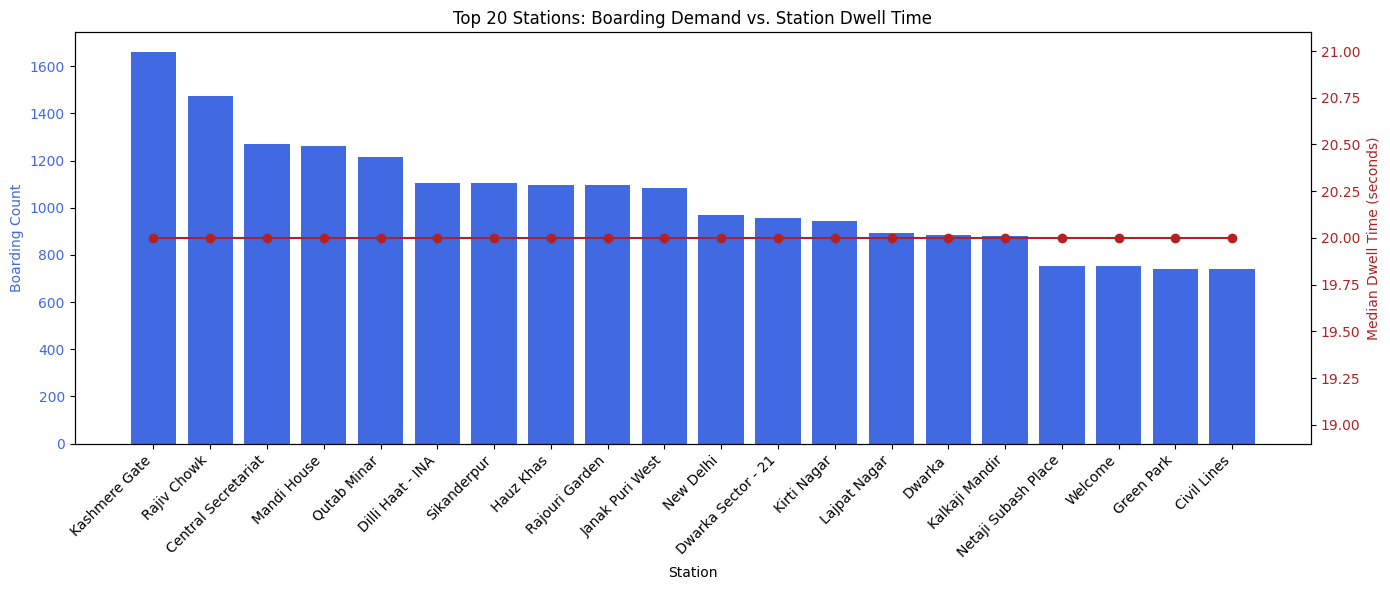

['Kashmere Gate', 'Rajiv Chowk', 'Central Secretariat', 'Mandi House', 'Qutab Minar', 'Dilli Haat - INA', 'Sikanderpur', 'Hauz Khas', 'Rajouri Garden', 'Janak Puri West', 'New Delhi', 'Dwarka Sector - 21', 'Kirti Nagar', 'Lajpat Nagar', 'Dwarka', 'Kalkaji Mandir', 'Netaji Subash Place', 'Welcome', 'Green Park', 'Civil Lines']


In [119]:
def time_to_sec(time):
    # Converted HH:MM:SS to total seconds since midnight
    try:
        h, m, s = [int(x) for x in str(time).split(":")]
        return h * 3600 + m * 60 + s
    except:
        return np.nan

# Calculate actual dwell time (sec) at each stop event
stop_times['arrival_sec'] = stop_times['arrival_time'].apply(time_to_sec)
stop_times['departure_sec'] = stop_times['departure_time'].apply(time_to_sec)
stop_times['dwell_time_sec'] = stop_times['departure_sec'] - stop_times['arrival_sec']

# Calculate station-level metrics
agg = (
    stop_times.groupby('stop_id')
    .agg(
        median_dwell_sec = ('dwell_time_sec', 'median'),
        mean_dwell_sec = ('dwell_time_sec', 'mean'),
        boarding_count = ('stop_id', 'count')
    )
    .reset_index()
)

# Map station names for readability
agg = agg.merge(stops[['stop_id', 'stop_name']], on='stop_id', how='left')
agg['score'] = agg['boarding_count'] * agg['median_dwell_sec']

# Find the top-20 stations needing the most dwell time due to high crowd
top20 = agg.sort_values('score', ascending=False).head(20)
fig, ax1 = plt.subplots(figsize=(14, 6))
top20 = top20.sort_values('score', ascending=False)

# Bar: Boarding counts (number of stop events)
ax1.bar(top20['stop_name'], top20['boarding_count'], color='royalblue', label='Number of Boardings')
ax1.set_xlabel('Station')
ax1.set_ylabel('Boarding Count', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
plt.xticks(rotation=45, ha='right')

# Line: Median dwell time (seconds), secondary axis
ax2 = ax1.twinx()
ax2.plot(top20['stop_name'], top20['median_dwell_sec'], color='firebrick', marker='o', label='Median Dwell Time (s)')
ax2.set_ylabel('Median Dwell Time (seconds)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

plt.title('Top 20 Stations: Boarding Demand vs. Station Dwell Time')
fig.tight_layout()
plt.show()



# Now select top 20 stations based on your ranking
top20 = agg_merged.sort_values('score', ascending=False).head(20)
top20 = top20.merge(
    stops[['stop_id', 'stop_name']],
    on='stop_id',
    how='left'
)
top20_station_list = top20['stop_name'].tolist()
print(top20_station_list)

# **The top 20 metro stations on the Delhi map and the line they lie on, for the priority actions  to enhance the efficiency and performance of metro systems.**

In [137]:
# Top 20 station names by crowd × dwell time
top_stations = [
    'Kashmere Gate', 'Rajiv Chowk', 'Central Secretariat', 'Mandi House',
    'Qutab Minar', 'Dilli Haat - INA', 'Sikanderpur', 'Hauz Khas',
    'Rajouri Garden', 'Janak Puri West', 'New Delhi', 'Dwarka Sector - 21',
    'Kirti Nagar', 'Lajpat Nagar', 'Dwarka', 'Kalkaji Mandir',
    'Netaji Subash Place', 'Welcome', 'Green Park', 'Civil Lines'
]

LINE_COLOR_MAP = {
    "RED": "red",
    "BLUE": "blue",
    "YELLOW": "gold",
    "GREEN": "green",
    "VIOLET": "purple",
    "ORANGE": "orange",
    "MAGENTA": "magenta",
    "PINK": "pink",
    "GRAY": "gray",
    "AQUA": "cadetblue",
    "RAPID": "lightblue",
    "ORANGE/AIRPORT": "orange"
}

# Assign each station a main line color
routes['LineColorShort'] = routes['route_long_name'].fillna('').str.split('_').str[0].str.upper()
routes['ColorName'] = routes['LineColorShort'].map(LINE_COLOR_MAP)
route_id_to_color = routes.set_index('route_id')['ColorName'].to_dict()
trip_to_route = trips.set_index("trip_id")["route_id"].to_dict()
stop_times['route_id'] = stop_times['trip_id'].map(trip_to_route)
stop_to_lines = (stop_times.groupby('stop_id')['route_id'].unique().apply(list).to_dict())

def get_main_line_color(stop_id):
    lines = stop_to_lines.get(stop_id, [])
    for route_id in lines:
        color = route_id_to_color.get(route_id)
        if color:
            return color
    return "black"

stops['stop_name'] = stops['stop_name'].str.strip()
top_stops = stops[stops['stop_name'].str.lower().isin([n.lower() for n in top_stations])].copy()
top_stops['main_color'] = top_stops['stop_id'].apply(get_main_line_color)

# Plot with tiny labels above each circle marker, no boxes
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=11)
for idx, row in top_stops.iterrows():
    # Marker for the station, colored by primary line
    folium.CircleMarker(
        location=[row['stop_lat'], row['stop_lon']],
        radius=8,
        color=row['main_color'],
        fill=True,
        fill_color=row['main_color'],
        fill_opacity=0.96,
        popup=row['stop_name']
    ).add_to(delhi_map)
    # Name label as a tiny floating text just above the marker (no box)
    folium.map.Marker(
        [row['stop_lat'] + 0.001, row['stop_lon']],
        icon=folium.DivIcon(
            icon_size=(50,10),
            icon_anchor=(0,0),
            html=(
                f'<span style="font-size:12.6px; color:#00060a; '
                f'font-weight:normal; background:rgba(255,255,255,0);">'
                f'{row["stop_name"]}'
                f'</span>'
            )
        )
    ).add_to(delhi_map)

display(delhi_map)

#           **THANK YOU !**